In [193]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from sklearn.model_selection import train_test_split
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)

Importing Data

In [194]:
train=pd.read_csv("C:\\Users\\Govind\\Downloads\\imarticus\\train.csv")
test=pd.read_csv("C:\\Users\\Govind\\Downloads\\imarticus\\test.csv")

In [195]:
train.head(10)

,id,headquarter,location.Code,date_of_establishment,location,loc.details,state,deposit_amount_2011,deposit_amount_2012,deposit_amount_2013,deposit_amount_2014,deposit_amount_2015,deposit_amount_2016,deposit_amount_2017
0,1,0,2871,1911-06-02,Wales,Waukesha,WI,32079.0,35971.5,37237.5,40362.0,46021.5,46020.0,69030.00
1,2,0,2872,NaN,Germantown,Washington,WI,83181.0,84846.0,97098.0,110284.5,122035.5,133905.0,200857.50
2,3,0,2873,1908-06-04,Brookfield,Waukesha,WI,136323.0,156450.0,187557.0,188859.0,198751.5,206044.5,309066.75
3,4,0,2874,NaN,Pewaukee,Waukesha,WI,68511.0,73932.0,79876.5,105603.0,112113.0,110755.5,166133.25
4,5,0,2875,NaN,Waukesha,Waukesha,WI,96271.5,108325.5,104880.0,121054.5,113956.5,109837.5,164756.25
5,6,0,2876,NaN,Waukesha,Waukesha,WI,93837.0,101592.0,118270.5,140280.0,150987.0,168742.5,253113.75
6,7,0,2877,NaN,Brookfield,Waukesha,WI,117655.5,130725.0,153216.0,179154.0,199660.5,214266.0,321399.00
7,8,0,2878,1961-04-01,New Berlin,Waukesha,WI,126933.0,144072.0,155919.0,164754.0,181075.5,184749.0,277123.50
8,9,0,2879,1933-02-05,Oconomowoc,Waukesha,WI,72700.5,73044.0,82053.0,85413.0,83767.5,87390.0,131085.00
9,10,0,2880,NaN,Butler,Waukesha,WI,73921.5,73033.5,73011.0,78331.5,80385.0,83619.0,125428.50


In [196]:
train_id = train["id"]
test_id = test["id"]

In [197]:
train.drop("id", axis = 1, inplace = True)
test.drop("id",axis = 1, inplace = True)

In [198]:
print(train.shape)
print(test.shape)

(3790, 13)
(1623, 12)


In [199]:
train.describe()

,headquarter,location.Code,deposit_amount_2011,deposit_amount_2012,deposit_amount_2013,deposit_amount_2014,deposit_amount_2015,deposit_amount_2016,deposit_amount_2017
count,3790.0,3790.000000,3.050000e+03,3.212000e+03,3.461000e+03,3.615000e+03,3.734000e+03,3.771000e+03,3.771000e+03
mean,0.0,5395.806332,1.683201e+05,1.882705e+05,1.933803e+05,2.045743e+05,2.183874e+05,2.364422e+05,3.546633e+05
std,0.0,1549.105135,4.196386e+06,5.171073e+06,5.320718e+06,5.610536e+06,5.970416e+06,6.422120e+06,9.633180e+06
min,0.0,2871.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.0,4067.250000,2.839800e+04,3.019912e+04,3.159750e+04,3.497175e+04,3.935850e+04,4.632150e+04,6.948225e+04
50%,0.0,5261.500000,5.344200e+04,5.577450e+04,5.961600e+04,6.353700e+04,7.015800e+04,7.877400e+04,1.181610e+05
75%,0.0,6863.250000,9.910912e+04,1.004205e+05,1.072440e+05,1.145288e+05,1.249448e+05,1.373490e+05,2.060235e+05
max,0.0,7994.000000,2.303660e+08,2.915820e+08,3.110520e+08,3.350930e+08,3.623109e+08,3.919391e+08,5.879087e+08


In [200]:
# now finding missing values
((train.isnull().sum()/len(train))*100).sort_values(ascending = False)

date_of_establishment    53.825858
deposit_amount_2011      19.525066
deposit_amount_2012      15.250660
deposit_amount_2013       8.680739
deposit_amount_2014       4.617414
deposit_amount_2015       1.477573
deposit_amount_2017       0.501319
deposit_amount_2016       0.501319
state                     0.000000
loc.details               0.000000
location                  0.000000
location.Code             0.000000
headquarter               0.000000
dtype: float64

In [201]:
train.isnull().sum()

headquarter                 0
location.Code               0
date_of_establishment    2040
location                    0
loc.details                 0
state                       0
deposit_amount_2011       740
deposit_amount_2012       578
deposit_amount_2013       329
deposit_amount_2014       175
deposit_amount_2015        56
deposit_amount_2016        19
deposit_amount_2017        19
dtype: int64

In [202]:
train.shape

(3790, 13)

In [203]:
# As we can see target variable also has missing values, firstly checking the missing values for target variable

In [204]:
train[train["deposit_amount_2017"].isnull()]

,headquarter,location.Code,date_of_establishment,location,loc.details,state,deposit_amount_2011,deposit_amount_2012,deposit_amount_2013,deposit_amount_2014,deposit_amount_2015,deposit_amount_2016,deposit_amount_2017
3761,0,7958,2016-07-06,Westminster,Orange,CA,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3772,0,7970,NaN,Mill Valley,Marin,CA,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3773,0,7972,NaN,Flemington,Hunterdon,NJ,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3774,0,7974,NaN,Coral Gables,Miami-Dade,FL,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3775,0,7975,NaN,Wellington,Palm Beach,FL,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3776,0,7976,NaN,Centennial,Arapahoe,CO,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3777,0,7977,NaN,Peoria,Peoria,IL,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3778,0,7978,2016-10-10,Miami,Miami-Dade,FL,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3779,0,7979,NaN,Irvine,Orange,CA,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3780,0,7980,2016-03-11,Laguna Niguel,Orange,CA,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [205]:
trn=train.loc[0:3771,]
trn.drop([3761],inplace=True)

In [206]:
# as we can see there are no null value in target variable, so we can work on other null values

In [207]:
trn.drop(["date_of_establishment"], axis=1, inplace= True)

In [208]:
trn.isnull().sum()

headquarter              0
location.Code            0
location                 0
loc.details              0
state                    0
deposit_amount_2011    721
deposit_amount_2012    559
deposit_amount_2013    310
deposit_amount_2014    156
deposit_amount_2015     37
deposit_amount_2016      0
deposit_amount_2017      0
dtype: int64

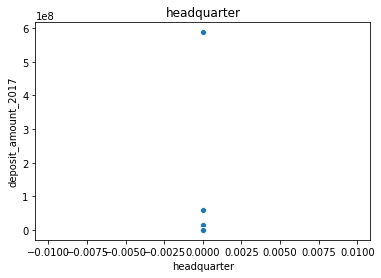

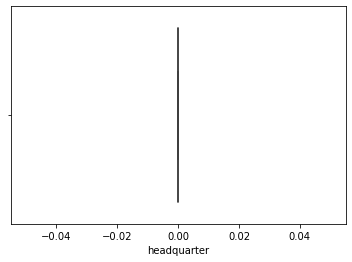

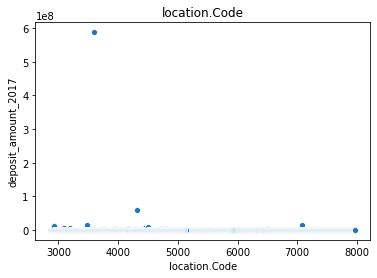

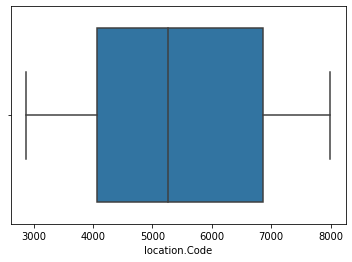

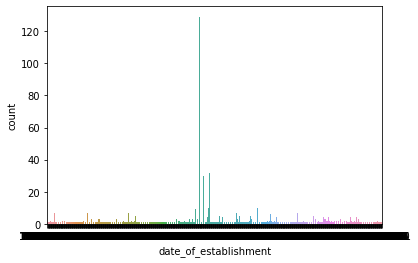

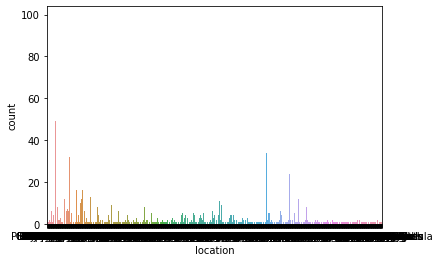

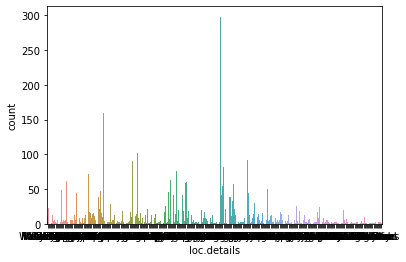

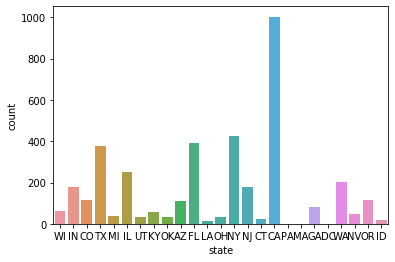

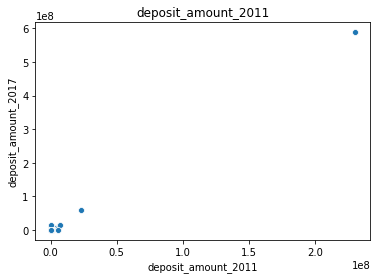

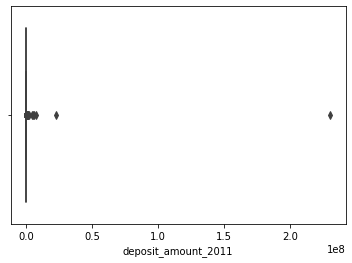

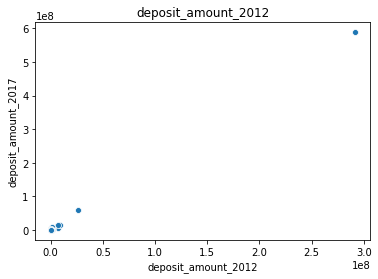

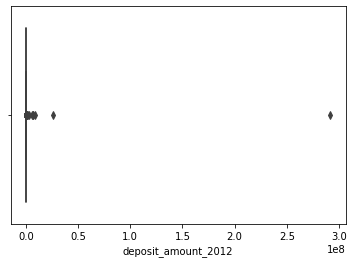

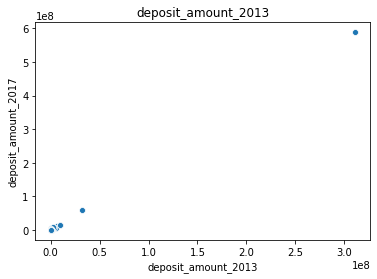

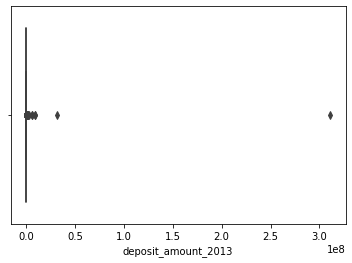

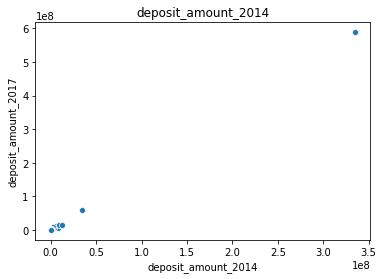

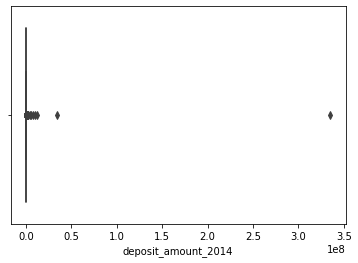

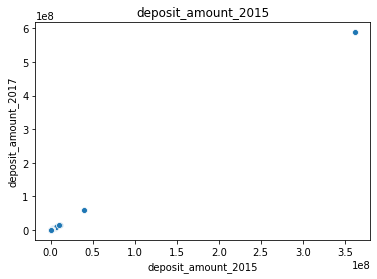

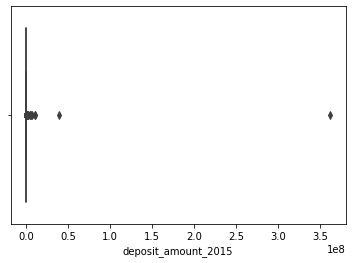

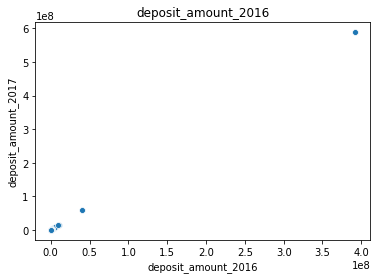

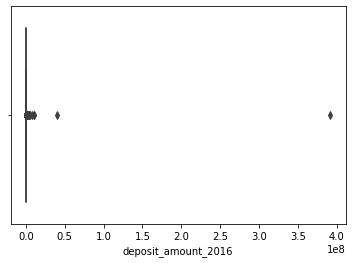

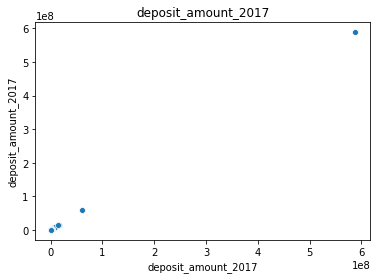

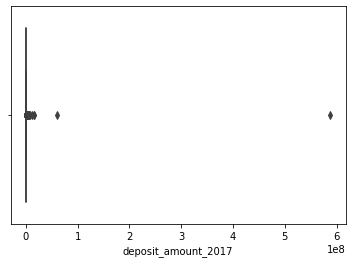

In [209]:
for i in train:
    if train[i].dtypes != 'object':
        plt.title(i)
        sns.scatterplot(x = train[i], y = train['deposit_amount_2017'])
        plt.xlabel(i)
        plt.ylabel('deposit_amount_2017')
        plt.show()
        sns.boxplot(train[i])
        plt.show()
    else:
        sns.countplot(train[i])
        plt.show()

In [210]:
sorted(trn["deposit_amount_2011"],reverse= True)

[230365992.0,
 22813977.0,
 7374436.5,
 5990880.0,
 5568664.5,
 4878639.0,
 2206657.5,
 1401051.0,
 1232988.0,
 865128.0,
 769930.5,
 725896.5,
 670005.0,
 631509.0,
 630129.0,
 627255.0,
 615552.0,
 589957.5,
 581292.0,
 577563.0,
 546972.0,
 542670.0,
 521659.5,
 505378.5,
 476757.0,
 461610.0,
 455535.0,
 440301.0,
 430939.5,
 427303.5,
 421033.5,
 417642.0,
 417325.5,
 412482.0,
 411390.0,
 408798.0,
 390186.0,
 370444.5,
 369843.0,
 360982.5,
 356727.0,
 342093.0,
 339172.5,
 334719.0,
 329863.5,
 329188.5,
 326685.0,
 324307.5,
 324082.5,
 317695.5,
 316576.5,
 315559.5,
 314091.0,
 310378.5,
 309478.5,
 308160.0,
 305694.0,
 305095.5,
 303468.0,
 301927.5,
 300990.0,
 300355.5,
 299853.0,
 299313.0,
 298611.0,
 297364.5,
 295540.5,
 293655.0,
 291015.0,
 289843.5,
 289326.0,
 289314.0,
 289125.0,
 288897.0,
 288801.0,
 287986.5,
 286698.0,
 284815.5,
 282979.5,
 282919.5,
 282718.5,
 281398.5,
 281367.0,
 280621.5,
 280548.0,
 278752.5,
 278520.0,
 277167.0,
 277071.0,
 276009.0

In [211]:
trn[trn["deposit_amount_2011"]> 5990880.0]= 5990880.0

In [212]:
sorted(trn["deposit_amount_2012"],reverse= True)

[7189416.0,
 6691308.0,
 5990880.0,
 5990880.0,
 5990880.0,
 5825133.0,
 2605894.5,
 1495294.5,
 1426755.0,
 1247913.0,
 905905.5,
 839911.5,
 790402.5,
 705922.5,
 692710.5,
 671202.0,
 657748.5,
 607839.0,
 554080.5,
 539880.0,
 537744.0,
 529609.5,
 528988.5,
 522904.5,
 515983.5,
 500646.0,
 497488.5,
 483654.0,
 482175.0,
 459933.0,
 452262.0,
 440559.0,
 439522.5,
 435102.0,
 433884.0,
 428257.5,
 420456.0,
 419898.0,
 416989.5,
 414970.5,
 402792.0,
 396049.5,
 394845.0,
 379971.0,
 378784.5,
 375885.0,
 370498.5,
 368439.0,
 364437.0,
 359779.5,
 358228.5,
 345766.5,
 344692.5,
 343084.5,
 342789.0,
 337968.0,
 336939.0,
 335257.5,
 334608.0,
 321244.5,
 320496.0,
 315078.0,
 312648.0,
 312448.5,
 309357.0,
 309165.0,
 309094.5,
 308254.5,
 307074.0,
 305839.5,
 304968.0,
 304878.0,
 304545.0,
 300837.0,
 300762.0,
 300115.5,
 299944.5,
 299505.0,
 298719.0,
 297007.5,
 296928.0,
 296178.0,
 294592.5,
 293803.5,
 292969.5,
 292012.5,
 291513.0,
 290622.0,
 289843.5,
 289830.0,


In [213]:
trn[trn["deposit_amount_2011"]> 2605894.5]= 2605894.5

In [214]:
sorted(trn["deposit_amount_2013"],reverse= True)

[9417007.5,
 3182014.5,
 2605894.5,
 2605894.5,
 2605894.5,
 2605894.5,
 2605894.5,
 2605894.5,
 1996056.0,
 1653763.5,
 1428234.0,
 1058547.0,
 974298.0,
 849810.0,
 843117.0,
 708900.0,
 701089.5,
 681258.0,
 661029.0,
 620160.0,
 613581.0,
 609027.0,
 602397.0,
 572281.5,
 568011.0,
 567951.0,
 554971.5,
 542676.0,
 522889.5,
 514714.5,
 514653.0,
 508375.5,
 492189.0,
 485938.5,
 473812.5,
 462780.0,
 459928.5,
 458599.5,
 450156.0,
 440736.0,
 438672.0,
 432469.5,
 428407.5,
 422920.5,
 422692.5,
 422310.0,
 419479.5,
 415741.5,
 411061.5,
 410475.0,
 398529.0,
 397720.5,
 397564.5,
 397032.0,
 391800.0,
 385174.5,
 384031.5,
 384022.5,
 379833.0,
 371131.5,
 366525.0,
 365625.0,
 360639.0,
 360541.5,
 357607.5,
 356208.0,
 354430.5,
 354196.5,
 347355.0,
 346546.5,
 343414.5,
 343014.0,
 340252.5,
 340038.0,
 336748.5,
 334755.0,
 334743.0,
 333720.0,
 328486.5,
 327076.5,
 326179.5,
 325567.5,
 324237.0,
 324174.0,
 321714.0,
 321244.5,
 320854.5,
 314529.0,
 313287.0,
 311709.0

In [215]:
trn[trn["deposit_amount_2013"]> 2605894.5]= 2605894.5

In [216]:
sorted(trn["deposit_amount_2014"],reverse= True)

[4044295.5,
 2605894.5,
 2605894.5,
 2605894.5,
 2605894.5,
 2605894.5,
 2605894.5,
 2605894.5,
 2605894.5,
 2578255.5,
 1507200.0,
 1503474.0,
 1097188.5,
 1062804.0,
 1021929.0,
 876082.5,
 869391.0,
 713724.0,
 712380.0,
 697974.0,
 677527.5,
 674689.5,
 660051.0,
 651382.5,
 618138.0,
 605641.5,
 604483.5,
 590410.5,
 586800.0,
 570759.0,
 548877.0,
 527271.0,
 521451.0,
 521029.5,
 515422.5,
 511759.5,
 506679.0,
 506646.0,
 494376.0,
 478344.0,
 478308.0,
 473383.5,
 458529.0,
 456693.0,
 453010.5,
 452317.5,
 450703.5,
 443218.5,
 443170.5,
 442399.5,
 439863.0,
 438652.5,
 434949.0,
 434782.5,
 428956.5,
 421149.0,
 414441.0,
 414181.5,
 404985.0,
 404653.5,
 403467.0,
 400630.5,
 396949.5,
 395298.0,
 393487.5,
 390418.5,
 387870.0,
 386841.0,
 381090.0,
 380545.5,
 379717.5,
 377907.0,
 376173.0,
 375853.5,
 374103.0,
 373938.0,
 372835.5,
 368220.0,
 366619.5,
 364200.0,
 361288.5,
 359616.0,
 358992.0,
 358729.5,
 356836.5,
 356373.0,
 356241.0,
 356200.5,
 351676.5,
 35131

In [217]:
trn[trn["deposit_amount_2014"]> 2605894.5]= 2605894.5

In [218]:
sorted(trn["deposit_amount_2015"],reverse= True)

[5717142.0,
 2605894.5,
 2605894.5,
 2605894.5,
 2605894.5,
 2605894.5,
 2605894.5,
 2605894.5,
 2605894.5,
 2605894.5,
 1915714.5,
 1571473.5,
 1265799.0,
 1161627.0,
 1143133.5,
 1122562.5,
 904218.0,
 760993.5,
 750568.5,
 750357.0,
 724987.5,
 659547.0,
 652650.0,
 652542.0,
 652497.0,
 648745.5,
 640674.0,
 632743.5,
 623713.5,
 611755.5,
 591403.5,
 588766.5,
 568056.0,
 553252.5,
 552219.0,
 545452.5,
 543168.0,
 537814.5,
 532912.5,
 531960.0,
 524097.0,
 512905.5,
 512032.5,
 511557.0,
 500008.5,
 496816.5,
 491814.0,
 491409.0,
 491301.0,
 485604.0,
 481432.5,
 480274.5,
 469549.5,
 468588.0,
 465436.5,
 461608.5,
 460438.5,
 460248.0,
 451309.5,
 449218.5,
 447526.5,
 442777.5,
 440877.0,
 437436.0,
 437065.5,
 432088.5,
 429586.5,
 427197.0,
 424761.0,
 423691.5,
 421489.5,
 419491.5,
 418258.5,
 417276.0,
 411655.5,
 409552.5,
 409408.5,
 409396.5,
 407556.0,
 405820.5,
 405414.0,
 403779.0,
 402903.0,
 402669.0,
 399901.5,
 393966.0,
 391242.0,
 390547.5,
 388434.0,
 3864

In [219]:
trn[trn["deposit_amount_2015"]> 2605894.5]= 2605894.5

In [220]:
sorted(trn["deposit_amount_2016"],reverse= True)

[2605894.5,
 2605894.5,
 2605894.5,
 2605894.5,
 2605894.5,
 2605894.5,
 2605894.5,
 2605894.5,
 2605894.5,
 2605894.5,
 2200014.0,
 1647972.0,
 1268323.5,
 1177093.5,
 1174441.5,
 1146777.0,
 934689.0,
 850081.5,
 803790.0,
 765354.0,
 757698.0,
 741106.5,
 734571.0,
 701458.5,
 687879.0,
 668253.0,
 666687.0,
 650209.5,
 633387.0,
 623968.5,
 620115.0,
 620073.0,
 615802.5,
 612099.0,
 611580.0,
 606079.5,
 603796.5,
 601119.0,
 585351.0,
 582180.0,
 581769.0,
 576408.0,
 572491.5,
 560584.5,
 560263.5,
 556552.5,
 543756.0,
 539919.0,
 539521.5,
 531136.5,
 525849.0,
 520851.0,
 519637.5,
 513709.5,
 513615.0,
 508446.0,
 504604.5,
 504256.5,
 498910.5,
 479281.5,
 477808.5,
 475297.5,
 473592.0,
 471706.5,
 471132.0,
 469636.5,
 465117.0,
 465030.0,
 463684.5,
 462247.5,
 462102.0,
 461833.5,
 461145.0,
 460242.0,
 453702.0,
 451555.5,
 442965.0,
 439693.5,
 439627.5,
 439626.0,
 437272.5,
 436798.5,
 435510.0,
 435034.5,
 431583.0,
 428920.5,
 428155.5,
 425320.5,
 422703.0,
 4176

In [221]:
trn[trn["deposit_amount_2016"]> 2605894.5]= 2605894.5

In [222]:
sorted(trn["deposit_amount_2017"],reverse= True)

[3300021.0,
 2605894.5,
 2605894.5,
 2605894.5,
 2605894.5,
 2605894.5,
 2605894.5,
 2605894.5,
 2605894.5,
 2605894.5,
 2605894.5,
 2471958.0,
 1902485.25,
 1765640.25,
 1761662.25,
 1720165.5,
 1402033.5,
 1275122.25,
 1205685.0,
 1148031.0,
 1136547.0,
 1111659.75,
 1101856.5,
 1052187.75,
 1031818.5,
 1002379.5,
 1000030.5,
 975314.25,
 950080.5,
 935952.75,
 930172.5,
 930109.5,
 923703.75,
 918148.5,
 917370.0,
 909119.25,
 905694.75,
 901678.5,
 878026.5,
 873270.0,
 872653.5,
 864612.0,
 858737.25,
 840876.75,
 840395.25,
 834828.75,
 815634.0,
 809878.5,
 809282.25,
 796704.75,
 788773.5,
 781276.5,
 779456.25,
 770564.25,
 770422.5,
 762669.0,
 756906.75,
 756384.75,
 748365.75,
 718922.25,
 716712.75,
 712946.25,
 710388.0,
 707559.75,
 706698.0,
 704454.75,
 697675.5,
 697545.0,
 695526.75,
 693371.25,
 693153.0,
 692750.25,
 691717.5,
 690363.0,
 680553.0,
 677333.25,
 664447.5,
 659540.25,
 659441.25,
 659439.0,
 655908.75,
 655197.75,
 653265.0,
 652551.75,
 647374.5,
 6

In [223]:
trn[trn["deposit_amount_2017"]> 2605894.5]= 2605894.5

In [224]:
# treatment of missing values

In [225]:
trn["deposit_amount_2011"].fillna(trn["deposit_amount_2017"].median(), inplace=True)
trn["deposit_amount_2012"].fillna(trn["deposit_amount_2012"].median(), inplace=True)
trn["deposit_amount_2013"].fillna(trn["deposit_amount_2013"].median(), inplace=True)
trn["deposit_amount_2014"].fillna(trn["deposit_amount_2014"].median(), inplace=True)
trn["deposit_amount_2015"].fillna(trn["deposit_amount_2015"].median(), inplace=True)

In [226]:
trn.isnull().sum()

headquarter            0
location.Code          0
location               0
loc.details            0
state                  0
deposit_amount_2011    0
deposit_amount_2012    0
deposit_amount_2013    0
deposit_amount_2014    0
deposit_amount_2015    0
deposit_amount_2016    0
deposit_amount_2017    0
dtype: int64

In [227]:
# no missing values

In [228]:
# checking duplicate values

In [229]:
trn.duplicated().sum()

10

In [230]:
trn.drop_duplicates(inplace=True)

In [231]:
trn.duplicated().sum()

0

In [232]:
# LablelEncoder is used to change category column  into numeric values

In [233]:
from sklearn.preprocessing import LabelEncoder

In [234]:
L=LabelEncoder()
for i in trn:
    if trn[i].dtypes== 'object':
        trn[i]=L.fit_transform(trn[i].astype(str))

In [235]:
# train test split

In [236]:
from sklearn.model_selection import train_test_split

In [237]:
trn1=trn.drop(["deposit_amount_2017"], axis=1)

In [238]:
from sklearn.decomposition import PCA


In [239]:
## PCA
# we are using PCA model for variables

pca=PCA(n_components=11)
pcaf=pca.fit_transform(trn1)
pca.explained_variance_ratio_

pcaf_D=pd.DataFrame(pcaf,columns=["pca1","pca2","pca3","pca4","pca5","pca6","pca7","pca8","pca9","pca10","pca11"])

# Than splitting data for training the models 

x=pcaf_D 
y=trn["deposit_amount_2017"]
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=.3,random_state=262)


In [240]:
# importing different models to run on the train data

In [241]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import AdaBoostRegressor,BaggingRegressor,ExtraTreesRegressor,GradientBoostingRegressor
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score,mean_absolute_error,mean_squared_error

In [242]:
### LinearModel 

LR=LinearRegression()
LR.fit(train_x,train_y)
LR.score(train_x,train_y)

1.0

In [243]:
### RidgeModel

R=Ridge()
R.fit(train_x,train_y)
R.score(train_x,train_y)

1.0

In [244]:
### LassoModel

L=Lasso()
L.fit(train_x,train_y)
L.score(train_x,train_y)

0.9999999999993706

In [245]:
### RandomForest

RD=RandomForestRegressor(n_estimators=100)
RD.fit(train_x,train_y)
RD.score(train_x,train_y)
pred_for= RD.predict(test_x)
RD.score(test_x,test_y)

0.9403024915786573

In [246]:
### DecisionTree

D=DecisionTreeRegressor()
L.fit(train_x,train_y)
L.score(train_x,train_y)


0.9999999999993706

In [247]:
# checking errors, as we can see model is baised so we are using RandomforestRegressor in implimenting the model

In [248]:
mean_absolute_error(test_y,pred_for)

7741.93323294951

In [249]:
mse=mean_squared_error(test_y,pred_for)
mse

1979912818.9178843

In [250]:

np.sqrt(mse)

44496.211287230784

In [251]:
# checking the test data 
# EDA

In [252]:
test.isnull().sum()

headquarter                0
location.Code              0
date_of_establishment    814
location                   0
loc.details                0
state                      0
deposit_amount_2011        0
deposit_amount_2012        0
deposit_amount_2013        0
deposit_amount_2014        0
deposit_amount_2015        0
deposit_amount_2016        0
dtype: int64

In [253]:
test.drop(["date_of_establishment"], axis=1, inplace= True)

In [254]:
test.isnull().sum()

headquarter            0
location.Code          0
location               0
loc.details            0
state                  0
deposit_amount_2011    0
deposit_amount_2012    0
deposit_amount_2013    0
deposit_amount_2014    0
deposit_amount_2015    0
deposit_amount_2016    0
dtype: int64

In [255]:
# labeling the test data

In [256]:
L=LabelEncoder()
for i in test:
    if test[i].dtypes== 'object':
        test[i]=L.fit_transform(test[i].astype(str))

In [257]:
pred=RD.predict(test)

In [258]:
test1=pd.read_csv("C:\\Users\\Govind\\Downloads\\imarticus\\test.csv")

In [260]:
pred_df=pd.DataFrame(pred,columns=["deposit_amount_2017"])
final2=pd.concat([test1["id"],pred_df],axis=1)
final2.to_csv("target1.csv",index=False)